https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/notebook

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("survey lung cancer.csv")

In [10]:
print(f"Shape of The Dataset : {data.shape}")

data.head()

Shape of The Dataset : (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [13]:
#Nao temos dados nulos
data.isna().sum().to_frame().T

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Masc" , "F" : "Fem"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Sim" , 1 : "Nao"})

data_temp["LUNG_CANCER"] = data_temp["LUNG_CANCER"].replace({"YES": "Sim", "NO": "Nao"})

data_temp.head()  

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao


In [15]:
# Observar o pq de uma pessoa ter cancer
data_posit = data_temp[data_temp['LUNG_CANCER'] == "Sim"]
data_posit.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
5,Fem,75,Nao,Sim,Nao,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,Sim
6,Masc,52,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim
7,Fem,51,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Nao,Sim


In [16]:
# Observar o pq de uma pessoa ter cancer
data_neg = data_temp[data_temp['LUNG_CANCER'] == "Nao"]
data_neg.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao
8,Fem,68,Sim,Nao,Sim,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao
12,Fem,60,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao


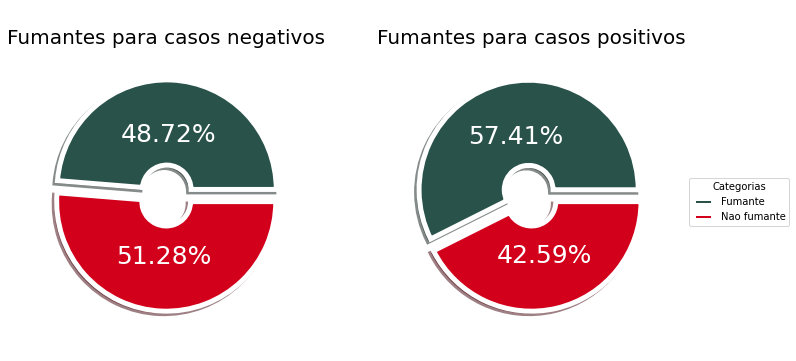

In [17]:
plt.subplots(figsize=(12, 12))

labels = "Fumante","Nao fumante"
size = 0.7


plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["SMOKING"]=="Sim"]["SMOKING"]),
                                    len(data_neg[data_neg["SMOKING"]=="Nao"]["SMOKING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nFumantes para casos negativos",fontsize=20, color = "black")

plt.subplot(1, 2, 2)

wedges1, texts1, autotexts1 = plt.pie([len(data_posit[data_posit["SMOKING"]=="Sim"]["SMOKING"]),
                                    len(data_posit[data_posit["SMOKING"]=="Nao"]["SMOKING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges1, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nFumantes para casos positivos",fontsize=20, color = "black")

plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

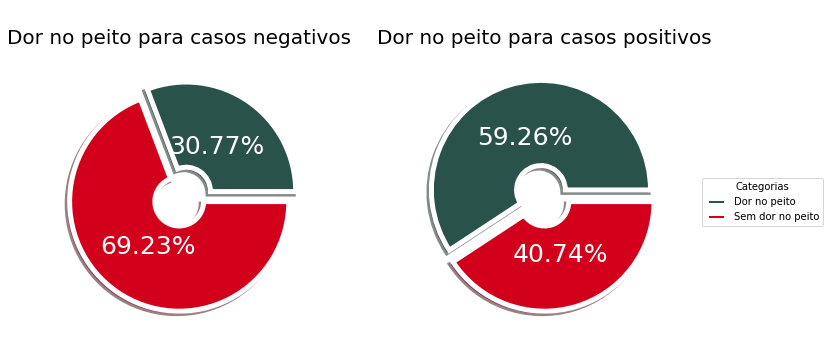

In [18]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Dor no peito","Sem dor no peito"
size = 0.7

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["CHEST PAIN"]=="Sim"]["CHEST PAIN"]),
                                    len(data_neg[data_neg["CHEST PAIN"]=="Nao"]["CHEST PAIN"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nDor no peito para casos negativos",fontsize=20, color = "black")

plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["CHEST PAIN"]=="Sim"]["CHEST PAIN"]),
                                    len(data_posit[data_posit["CHEST PAIN"]=="Nao"]["CHEST PAIN"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nDor no peito para casos positivos",fontsize=20, color = "black")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

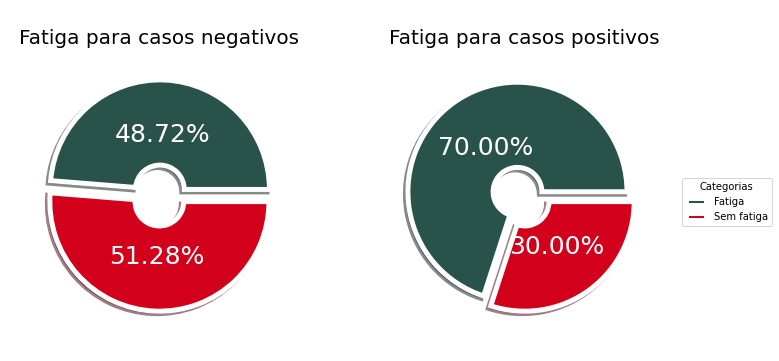

In [19]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Fatiga","Sem fatiga"
size = 0.7

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["FATIGUE "]=="Sim"]["FATIGUE "]),
                                    len(data_neg[data_neg["FATIGUE "]=="Nao"]["FATIGUE "])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nFatiga para casos negativos",fontsize=20, color = "black")


plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["FATIGUE "]=="Sim"]["FATIGUE "]),
                                    len(data_posit[data_posit["FATIGUE "]=="Nao"]["FATIGUE "])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nFatiga para casos positivos",fontsize=20, color = "black")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

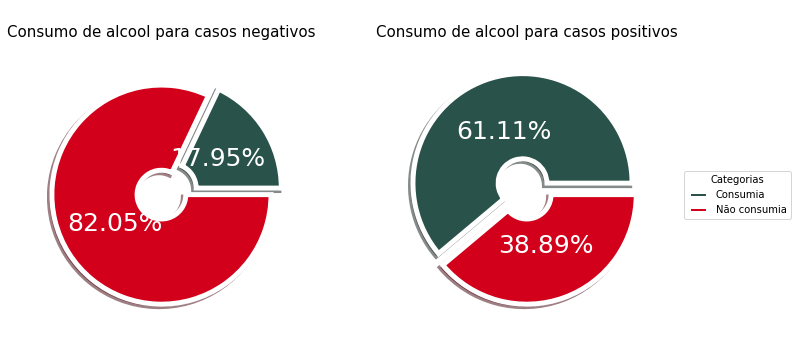

In [20]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Consumia","Não consumia"
size = 0.7

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie([len(data_neg[data_neg["ALCOHOL CONSUMING"]=="Sim"]["ALCOHOL CONSUMING"]),
                                    len(data_neg[data_neg["ALCOHOL CONSUMING"]=="Nao"]["ALCOHOL CONSUMING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

#plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes para casos negativos",fontsize=20, color = "white")
plt.title("\nConsumo de alcool para casos negativos",fontsize=15, color = "black")


plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["ALCOHOL CONSUMING"]=="Sim"]["ALCOHOL CONSUMING"]),
                                    len(data_posit[data_posit["ALCOHOL CONSUMING"]=="Nao"]["ALCOHOL CONSUMING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#29524A","#D2001A"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nConsumo de alcool para casos positivos",fontsize=15, color = "black")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

In [21]:
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

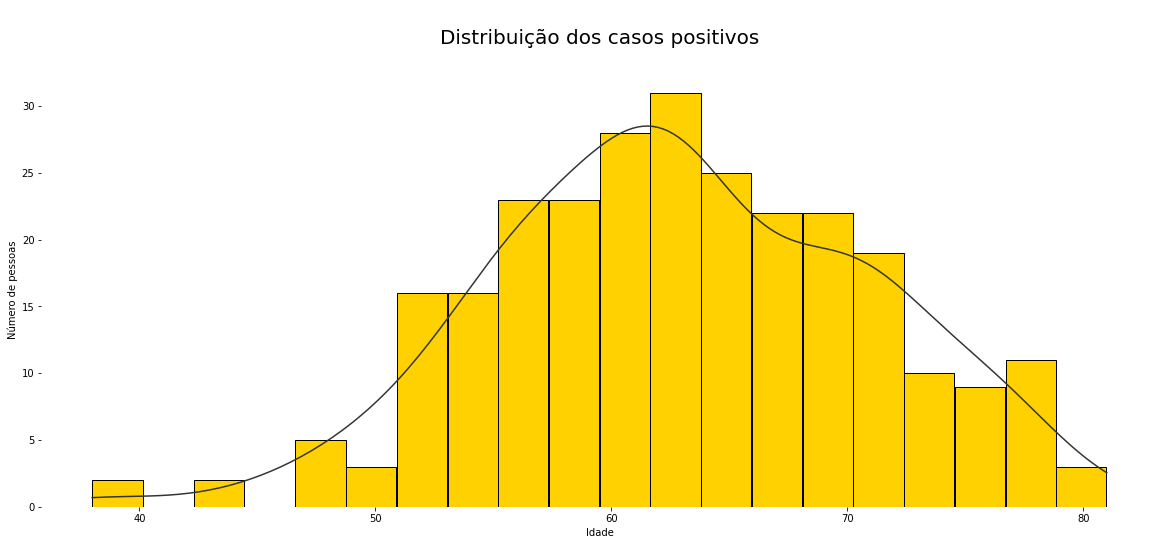

In [22]:
plt.subplots(figsize=(20, 8))
#hue="GENDER",
p = sns.histplot(data=data_posit,x="AGE",multiple="stack",color=palette[11],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.lines[0].set_color(palette[12])
#p.axes.lines[1].set_color(palette[9])
p.axes.set_title("\nDistribuição dos casos positivos\n",fontsize=20)
plt.ylabel("Número de pessoas")
plt.xlabel("Idade")

sns.despine(left=True, bottom=True)
plt.show()

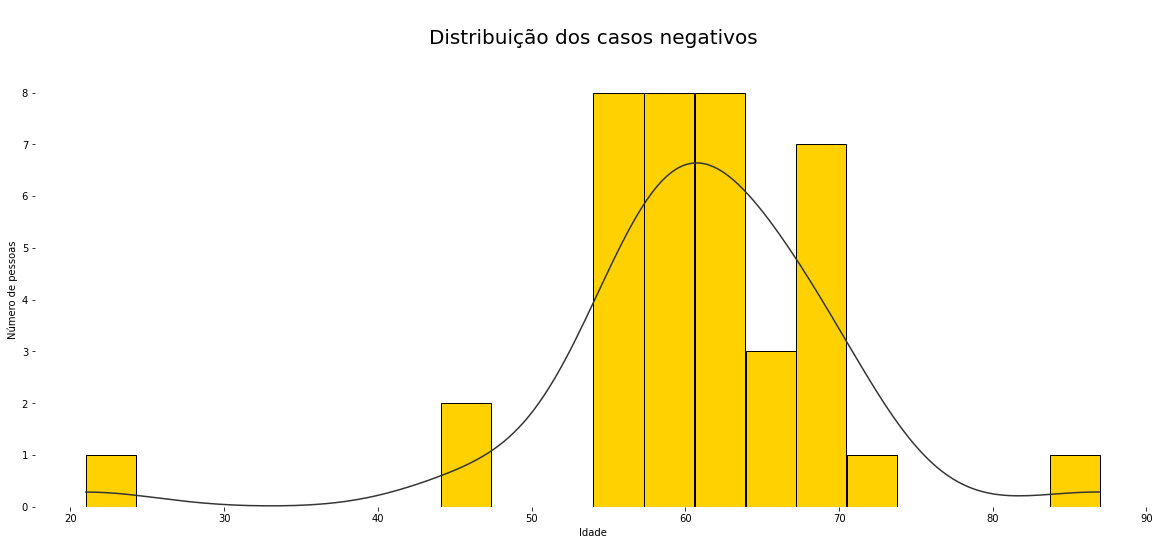

In [23]:
plt.subplots(figsize=(20, 8))
#hue="GENDER",
p = sns.histplot(data=data_neg,x="AGE",multiple="stack",color=palette[11],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.lines[0].set_color(palette[12])
#p.axes.lines[1].set_color(palette[9])
p.axes.set_title("\nDistribuição dos casos negativos\n",fontsize=20)
plt.ylabel("Número de pessoas")
plt.xlabel("Idade")

sns.despine(left=True, bottom=True)
plt.show()

In [24]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_outEnc = data.copy()
data_outEnc["GENDER"] = data_outEnc["GENDER"].replace({"M" : "Masc" , "F" : "Fem"})

for column in data_outEnc.columns:
    data_outEnc[column] = data_outEnc[column].replace({2: "Sim" , 1 : "Nao"})

data_outEnc["LUNG_CANCER"] = data_outEnc["LUNG_CANCER"].replace({"YES": "Sim", "NO": "Nao"})

data_outEnc.head()  

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao


Text(0.5, 1.0, '\nDistribuição entre os gêneros')

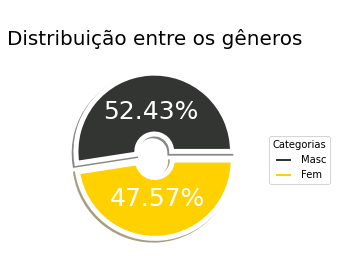

In [25]:
labels = "Masc", "Fem"
size = 0.7

wedges, texts, autotexts = plt.pie([len(data_outEnc[data_outEnc["GENDER"]=="Masc"]["GENDER"]),
                                    len(data_outEnc[data_outEnc["GENDER"]=="Fem"]["GENDER"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = [palette[12],palette[11]], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nDistribuição entre os gêneros",fontsize=20, color = "black")

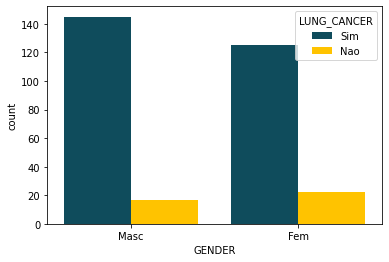

In [26]:
sns.countplot(data=data_outEnc,x="GENDER",hue="LUNG_CANCER",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"],saturation=1)
plt.show()

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

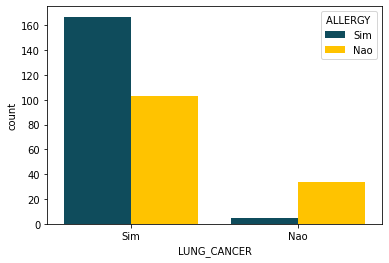

In [27]:
#sns.histplot(data = data_outEnc, x = "LUNG_CANCER" ,y = "ALLERGY")
sns.countplot(data=data_outEnc,x="LUNG_CANCER",hue="ALLERGY ",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"],saturation=1)

<AxesSubplot:xlabel='ALCOHOL CONSUMING', ylabel='Percent'>

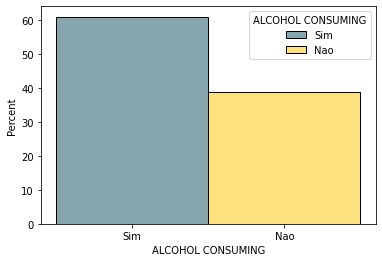

In [28]:
sns.histplot(data=data_posit, x="ALCOHOL CONSUMING", hue="ALCOHOL CONSUMING",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"], stat='percent')

In [29]:
import sklearn

In [30]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])

data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


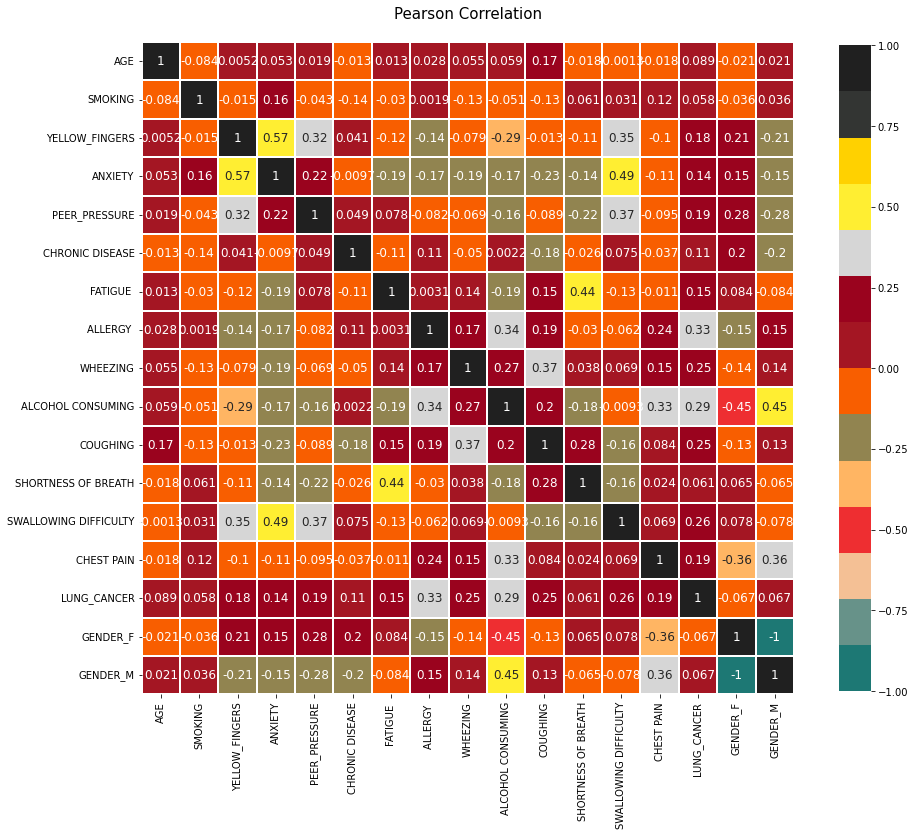

In [31]:
plt.subplots(figsize =(16, 12))

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation\n", size=15)
plt.xticks(rotation=90)
plt.show()

In [32]:
#Todos os dados
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (247, 16), (247,)
Shape of testing data : (62, 16), (62,)


In [33]:
data_esc = data.copy()

data_esc["LUNG_CANCER"] = LabelEncoder.fit_transform(data_esc["LUNG_CANCER"])
data_esc = data_esc.drop(["AGE","SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC DISEASE", "WHEEZING", "COUGHING", "SHORTNESS OF BREATH","SWALLOWING DIFFICULTY", "GENDER_F", "GENDER_M"], axis = 1)

data_esc.head()  

,FATIGUE,ALLERGY,ALCOHOL CONSUMING,CHEST PAIN,LUNG_CANCER
0,2,1,2,2,1
1,2,2,1,2,1
2,2,1,1,2,0
3,1,1,2,2,0
4,1,1,1,1,0


In [34]:
x1 = data_esc.drop("LUNG_CANCER", axis = 1)
y1 = data_esc["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train1.shape}, {y_train1.shape}")
print(f"Shape of testing data : {x_test1.shape}, {y_test1.shape}")

Shape of training data : (247, 4), (247,)
Shape of testing data : (62, 4), (62,)


In [35]:
import tensorflow

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [37]:
meuModelo = Sequential()
meuModelo.add(Dense(128, input_dim=(x_train.shape[-1])))
meuModelo.add(Dense(32))
meuModelo.add(Dense(1, activation = "sigmoid"))

In [38]:
meuModelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [39]:
meuModelo.compile(optimizer=Adam(learning_rate=0.004),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"]
                )

In [40]:
hist = meuModelo.fit(x_train,
                     y_train,
                     epochs = 50,
                     verbose = 1,
                     batch_size = 32,
                     validation_data = (x_test, y_test)
                    )

Epoch 1/50
8/8 [==============================] - 1s 57ms/step - loss: 0.5701 - accuracy: 0.7206 - val_loss: 0.4333 - val_accuracy: 0.7742
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 0.3364 - accuracy: 0.8866 - val_loss: 0.2139 - val_accuracy: 0.9355
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2482 - accuracy: 0.9109 - val_loss: 0.1266 - val_accuracy: 0.9677
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9271 - val_loss: 0.1315 - val_accuracy: 0.9355
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2103 - accuracy: 0.9069 - val_loss: 0.0952 - val_accuracy: 0.9839
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2014 - accuracy: 0.9312 - val_loss: 0.1235 - val_accuracy: 0.9516
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1784 - accuracy: 0.9312 - val_loss: 0.1026 - val_accuracy: 0.9516
Epoch 8/50
8/8 [===============

In [41]:
meuModelo.save('firstM.h5')

In [42]:
meuModelo1 = Sequential()
meuModelo1.add(Dense(128, input_dim=(x_train1.shape[-1])))
meuModelo1.add(Dense(32))
meuModelo1.add(Dense(1, activation = "sigmoid"))

In [43]:
x_train1.shape[-1]

4

In [44]:
meuModelo1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               640       
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [45]:
meuModelo1.compile(optimizer=Adam(learning_rate=0.004),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"]
                )

In [46]:
hist1 = meuModelo1.fit(x_train1,
                     y_train1,
                     epochs = 50,
                     verbose = 1,
                     batch_size = 32,
                     validation_data = (x_test1, y_test1)
                    )

Epoch 1/50
8/8 [==============================] - 1s 40ms/step - loss: 0.5897 - accuracy: 0.6761 - val_loss: 0.5455 - val_accuracy: 0.8226
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4135 - accuracy: 0.8462 - val_loss: 0.2474 - val_accuracy: 0.9355
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3226 - accuracy: 0.8664 - val_loss: 0.1613 - val_accuracy: 0.9677
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3137 - accuracy: 0.8664 - val_loss: 0.1773 - val_accuracy: 0.9355
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3212 - accuracy: 0.8785 - val_loss: 0.1582 - val_accuracy: 0.9355
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3144 - accuracy: 0.8785 - val_loss: 0.1621 - val_accuracy: 0.9355
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3234 - accuracy: 0.8745 - val_loss: 0.1608 - val_accuracy: 0.9355
Epoch 8/50
8/8 [=================

In [47]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_esc2 = data.copy()

data_esc2["LUNG_CANCER"] = LabelEncoder.fit_transform(data_esc2["LUNG_CANCER"])
data_esc2 = data_esc2.drop(["AGE","SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC DISEASE", "WHEEZING", "SHORTNESS OF BREATH", "GENDER_F", "GENDER_M"], axis = 1)

data_esc2.head()  

,FATIGUE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,1,2,2,2,2,1
1,2,2,1,1,2,2,1
2,2,1,1,2,1,2,0
3,1,1,2,1,2,2,0
4,1,1,1,2,1,1,0


In [48]:
x2 = data_esc2.drop("LUNG_CANCER", axis = 1)
y2 = data_esc2["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x2 = scaler.fit_transform(x2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train2.shape}, {y_train2.shape}")
print(f"Shape of testing data : {x_test2.shape}, {y_test2.shape}")

Shape of training data : (247, 6), (247,)
Shape of testing data : (62, 6), (62,)


In [49]:
meuModelo2 = Sequential()
meuModelo2.add(Dense(128, input_dim=(x_train2.shape[-1])))
meuModelo2.add(Dense(32))
meuModelo2.add(Dense(1, activation = "sigmoid"))

In [50]:
meuModelo2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [51]:
meuModelo2.compile(optimizer=Adam(learning_rate=0.004),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"]
                )

In [52]:
hist2 = meuModelo2.fit(x_train2,
                     y_train2,
                     epochs = 50,
                     verbose = 1,
                     batch_size = 32,
                     validation_data = (x_test2, y_test2)
                    )

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 0.5503 - accuracy: 0.7449 - val_loss: 0.4191 - val_accuracy: 0.8065
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3453 - accuracy: 0.8421 - val_loss: 0.1936 - val_accuracy: 0.9516
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2639 - accuracy: 0.8664 - val_loss: 0.1397 - val_accuracy: 0.9516
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2723 - accuracy: 0.8947 - val_loss: 0.1326 - val_accuracy: 0.9516
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2469 - accuracy: 0.8785 - val_loss: 0.1536 - val_accuracy: 0.9516
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2527 - accuracy: 0.8866 - val_loss: 0.1683 - val_accuracy: 0.9516
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2543 - accuracy: 0.8947 - val_loss: 0.1556 - val_accuracy: 0.9516
Epoch 8/50
8/8 [=================

In [53]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
max(hist.history['accuracy'])

0.9392712712287903

In [58]:
hist2.history['accuracy'][-1]

0.8947368264198303

Text(0.5, 1.0, 'Precisao de cada modelo')

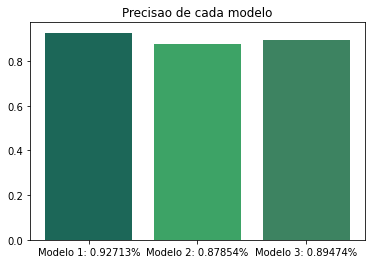

In [60]:
acc1 = hist.history['accuracy'][-1]
acc2 = hist1.history['accuracy'][-1]
acc3 = hist2.history['accuracy'][-1]
x_title = ['Modelo 1: ' + str(round(acc1, 5)) + '%', 'Modelo 2: ' + str(round(acc2, 5)) + '%', 'Modelo 3: ' + str(round(acc3, 5)) + '%']
y_val = [acc1, acc2, acc3]

plt.bar(x= x_title, height= y_val, color = ['#1C6758','#3DA366' ,'#3D8361'])
plt.title("Precisao de cada modelo")

Text(0.5, 1.0, 'Tamanho de cada modelo, em # de parametros')

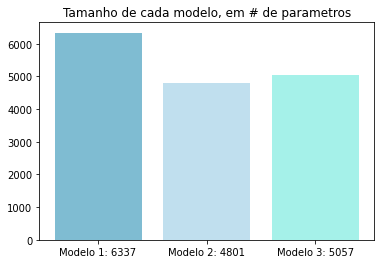

In [57]:
models_size = [6337,4801,5057]#pegos dos summarys de cada modelo
x_title2 = ['Modelo 1: ' + str(models_size[0]) , 'Modelo 2: ' + str(models_size[1]), 'Modelo 3: ' + str(models_size[2])]
plt.bar(x= x_title2, height= models_size, color = ['#7FBCD2','#C0DFEE' ,'#A5F1E9'])
plt.title("Tamanho de cada modelo, em # de parametros")
